# PROJECT : Explore Weather Trends

**STEPS TAKEN IN THE PROJECT**

**1. Data Extraction**

    1.1 SQL queiries used in extracting data.
    
    1.2 Extracting data for "Kathmandu" city only.
**2. Data Cleaning**

    2.1 Handling NUll(NAN/NA) values 
    
**3. Data Exploration**

    3.1 Calculating the moving averages with 10 years as a window.
**4. Data Visualization**

    4.1 Plotting the line-graphs between global avgerage  and moving average temperature.
    
    4.2 Plotting the graphs between Kathmandu average temperature and it's moving average.
    
    4.3 Plotting the graphs between global moving average and kathmandu moving average.
    
    4.4 Plotting the linear trend of the moving averages.

## Data Extraction

### SQL Queries used in extracting data

In [ ]:
#Extract all data from city_data table;
SELECT * FROM city_data;  #Data for kathmandu city is extracted later on using pandas

#Extracct all data from city_list table;
SELECT * FROM city_list;

#Extract all data from global_data list;
SELECT * FROM globl_data;

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression

In [3]:
filepath = '~/Documents/udacity/data-analyst/data-weather'
city_list = pd.read_csv(os.path.join(filepath, 'city_list.csv'), delimiter=',') 
city_data = pd.read_csv(os.path.join(filepath,'city_data.csv'), delimiter=',')
global_data = pd.read_csv(os.path.join(filepath, 'global_data.csv'), delimiter=',')

In [4]:
city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [5]:
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [6]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [83]:
global_data.tail()

,year,avg_temp
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57
265,2015,9.83


In [7]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [8]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      70792 non-null  int64  
 1   city      70792 non-null  object 
 2   country   70792 non-null  object 
 3   avg_temp  68245 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


### Extracting data for my city 'Kathmandu' only

In [16]:
data_ktm = city_data[city_data["city"] == "Kathmandu"]

## Data Cleaning

### Handling Null values 

In [9]:
# for col in city_data.columns:
#     isna = city_data[col].isna()
#     print("Total null values in {} is {} ".format(col,sum(isna)))

In [10]:
def check_null(data):
    for col in data.columns:
        isna_df = data[col].isna()
        print("Total null values in {} is {} ".format(col, sum(isna_df)))

In [90]:
print("\n Checking Null values for 'global_data'")
check_null(global_data)

print("\n Checking Null Values for 'city_data'" )
check_null(city_data)

print("\n Checking Null Values for 'city_list'" )
check_null(city_list)


 Checking Null values for 'global_data'
Total null values in year is 0 
Total null values in avg_temp is 0 

 Checking Null Values for 'city_data'
Total null values in year is 0 
Total null values in city is 0 
Total null values in country is 0 
Total null values in avg_temp is 2547 


In [12]:
isna_df = city_data["avg_temp"].isna()

In [13]:
city_null_temp = city_data[isna_df]["city"].unique()

In [14]:
'Kathmandu' in city_null_temp

True

In [15]:
city_data.count()

year        70792
city        70792
country     70792
avg_temp    68245
dtype: int64

In [17]:
data_ktm.head(5)

,year,city,country,avg_temp
30876,1796,Kathmandu,Nepal,14.51
30877,1797,Kathmandu,Nepal,15.88
30878,1798,Kathmandu,Nepal,14.33
30879,1799,Kathmandu,Nepal,14.76
30880,1800,Kathmandu,Nepal,14.69


In [18]:
data_ktm.tail()

,year,city,country,avg_temp
31089,2009,Kathmandu,Nepal,15.91
31090,2010,Kathmandu,Nepal,15.96
31091,2011,Kathmandu,Nepal,15.12
31092,2012,Kathmandu,Nepal,15.20
31093,2013,Kathmandu,Nepal,15.79


In [19]:
sum(data_ktm["avg_temp"].isna())

12

In [20]:
data_ktm[data_ktm["avg_temp"].isna()]

,year,city,country,avg_temp
30888,1808,Kathmandu,Nepal,NaN
30889,1809,Kathmandu,Nepal,NaN
30890,1810,Kathmandu,Nepal,NaN
30891,1811,Kathmandu,Nepal,NaN
30892,1812,Kathmandu,Nepal,NaN
30938,1858,Kathmandu,Nepal,NaN
30939,1859,Kathmandu,Nepal,NaN
30940,1860,Kathmandu,Nepal,NaN
30941,1861,Kathmandu,Nepal,NaN
30942,1862,Kathmandu,Nepal,NaN


In [21]:
data_ktm.describe()

,year,avg_temp
count,218.000000,206.000000
mean,1904.500000,14.663592
std,63.075352,0.539040
min,1796.000000,13.250000
25%,1850.250000,14.370000
50%,1904.500000,14.655000
75%,1958.750000,15.005000
max,2013.000000,16.560000


In [22]:
data_ktm.count()

year        218
city        218
country     218
avg_temp    206
dtype: int64

**Replacing the NAN records of 'avg_temp' by the mean of avg_temp**

In [23]:
values = {"avg_temp" : np.mean(data_ktm["avg_temp"])}
df_ktm = data_ktm.fillna(value = values).copy()

In [24]:
# checking whether the NAN value fwas illed in the 'avg_temp'column or not
df_ktm[(df_ktm["year"] >= 1808) & (df_ktm["year"] <= 1812)]

,year,city,country,avg_temp
30888,1808,Kathmandu,Nepal,14.663592
30889,1809,Kathmandu,Nepal,14.663592
30890,1810,Kathmandu,Nepal,14.663592
30891,1811,Kathmandu,Nepal,14.663592
30892,1812,Kathmandu,Nepal,14.663592


## Data Exploration

### Calculating the Moving Averages with 10 years as a window 

In [25]:
df_ktm["moving_averages"] = df_ktm["avg_temp"].rolling(window = 10).mean()

In [26]:
df_ktm.reset_index(inplace = True, drop = True)

In [27]:
df_ktm_mov_avg = df_ktm.copy()

In [28]:
df_ktm_mov_avg[10:20]

,year,city,country,avg_temp,moving_averages
10,1806,Kathmandu,Nepal,14.700000,14.850000
11,1807,Kathmandu,Nepal,14.680000,14.730000
12,1808,Kathmandu,Nepal,14.663592,14.763359
13,1809,Kathmandu,Nepal,14.663592,14.753718
14,1810,Kathmandu,Nepal,14.663592,14.751078
15,1811,Kathmandu,Nepal,14.663592,14.791437
16,1812,Kathmandu,Nepal,14.663592,14.747796
17,1813,Kathmandu,Nepal,14.040000,14.666796
18,1814,Kathmandu,Nepal,13.520000,14.503796
19,1815,Kathmandu,Nepal,13.560000,14.381796


In [29]:
df_kathmandu = df_ktm_mov_avg.copy()

In [30]:
df_global = global_data.copy()

In [31]:
df_global[0:10]

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
5,1755,8.36
6,1756,8.85
7,1757,9.02
8,1758,6.74
9,1759,7.99


In [32]:
df_global["moving_averages"] = df_global["avg_temp"].rolling(window=10).mean()

In [33]:
df_global[10:20]

,year,avg_temp,moving_averages
10,1760,7.19,7.877
11,1761,8.77,7.956
12,1762,8.61,8.239
13,1763,7.50,8.150
14,1764,8.40,8.143
15,1765,8.25,8.132
16,1766,8.41,8.088
17,1767,8.22,8.008
18,1768,6.78,8.012
19,1769,7.69,7.982


### Calculating the correlation coefficients

In [123]:
#Take records in between 1796 to 2013 from global_data to match with the available data of Kathmandu
split_global = df_global[(df_global["year"] >= 1796) & (df_global["year"] <= 2013)]
split_global.reset_index(inplace = True, drop = True)

In [133]:
avg_global = split_global["avg_temp"]

In [134]:
avg_ktm  = df_kathmandu["avg_temp"]

In [135]:
avg_ktm

0      14.51
1      15.88
2      14.33
3      14.76
4      14.69
       ...  
213    15.91
214    15.96
215    15.12
216    15.20
217    15.79
Name: avg_temp, Length: 218, dtype: float64

In [136]:
st.pearsonr(avg_global, avg_ktm)

(0.7140927153194656, 2.670490444560201e-35)


* **Correlation coefficient is positive(== 0.71) between global and kathmandu's average temperature and the P-Value is 2.67e-35.** 

## Data Visualization

### Plotting the line-graphs between global avgerage  and moving average temperature.

Text(0.5, 1.0, 'Comparing GlobalAverage Temperature Vs MovingAverage Temperature')

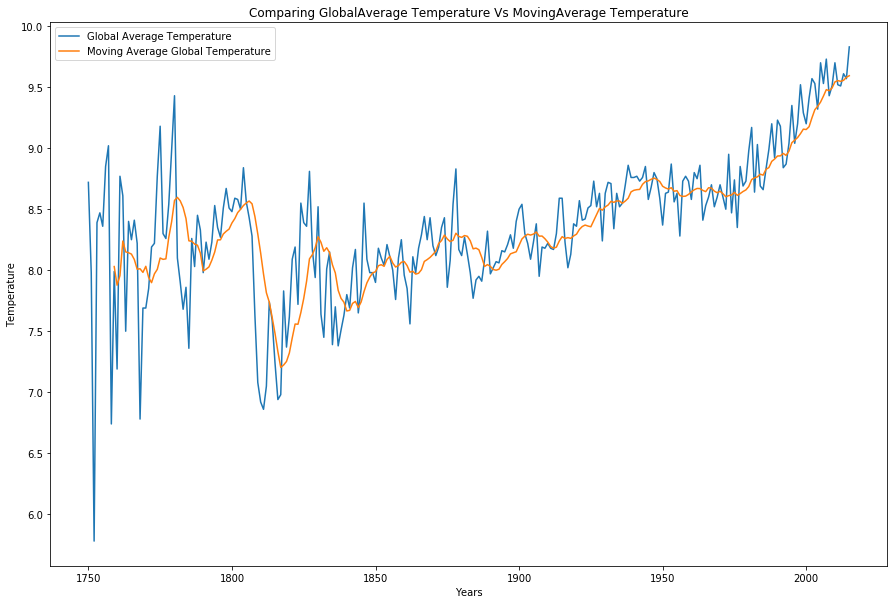

In [35]:
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = "year", y = "avg_temp", data= df_global, label = "Global Average Temperature")
sns.lineplot(x = "year", y = "moving_averages", data= df_global, label = "Moving Average Global Temperature")
ax.legend()
ax.set_ylabel("Temperature")
ax.set_xlabel("Years")
ax.set_title("Comparing GlobalAverage Temperature Vs MovingAverage Temperature")

### Plotting the graphs between Kathmandu average temperature and it's moving average 

Text(0.5, 1.0, "Comparing Kathmandu's Average Vs Its Moving Average Temperature")

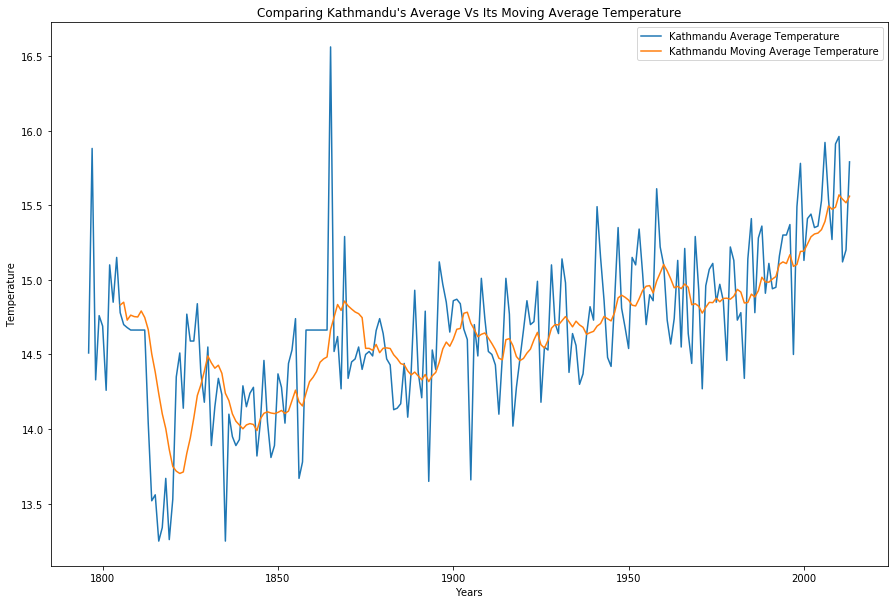

In [36]:
# fig.savefig('global vs moving average', dpi= 100)
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(x = "year", y = "avg_temp", data= df_kathmandu, label= "Kathmandu Average Temperature")
sns.lineplot(x = "year", y = "moving_averages", data = df_kathmandu, label = "Kathmandu Moving Average Temperature")
ax.legend()
ax.set_ylabel("Temperature")
ax.set_xlabel("Years")
ax.set_title("Comparing Kathmandu's Average Vs Its Moving Average Temperature")

### Plotting the graphs between global moving average and kathmandu moving average

Text(0.5, 1.0, "Global Moving Average Vs Kathmandu's Moving Averages")

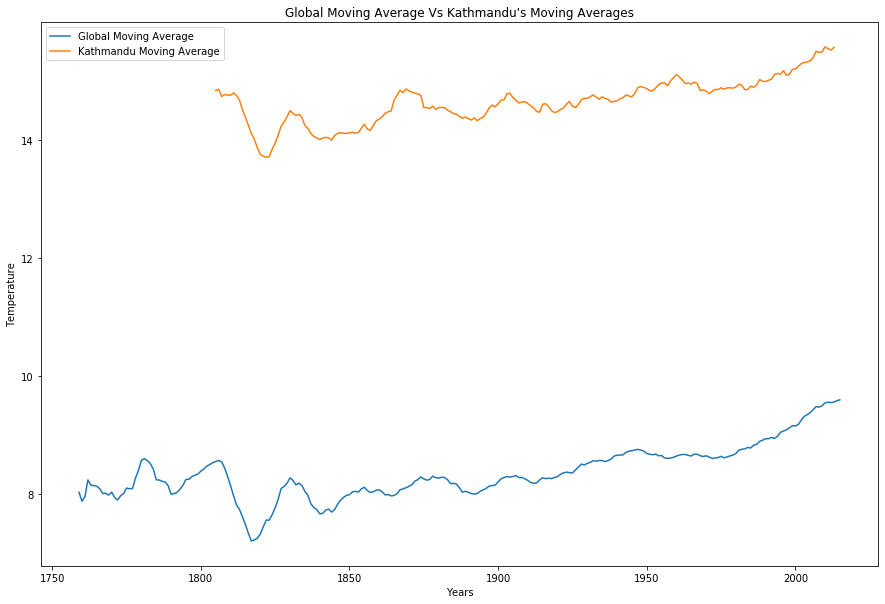

In [37]:
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = "year", y = "moving_averages", data= df_global, label= "Global Moving Average")
sns.lineplot(x = "year", y = "moving_averages", data = df_kathmandu, label = "Kathmandu Moving Average")
ax.legend()
ax.set_ylabel("Temperature")
ax.set_xlabel("Years")
ax.set_title("Global Moving Average Vs Kathmandu's Moving Averages")

### Plotting the linear trend of the moving averages

In [77]:
X_global = np.array(df_global["year"]).reshape(-1,1)
y_global = np.array(df_global["avg_temp"]).reshape(-1,1)
model_global = LinearRegression().fit(X= X_global, y= y_global)
trend_global = model_global.predict(X_global)

In [78]:
X_ktm = np.array(df_kathmandu["year"]).reshape(-1,1)
y_ktm = np.array(df_kathmandu["avg_temp"]).reshape(-1,1)
model_ktm = LinearRegression().fit(X= X_ktm, y= y_ktm)
trend_ktm = model_ktm.predict(X_ktm)

Text(0.5, 1.0, "Global Moving Average Vs Kathmandu's Moving Averages")

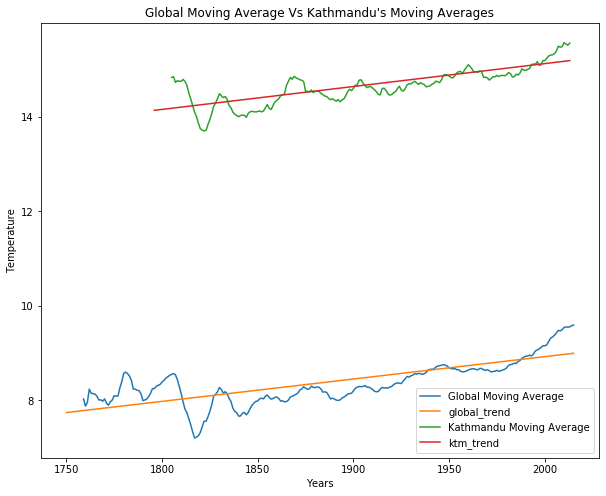

In [79]:
fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(x = "year", y = "moving_averages", data= df_global, label= "Global Moving Average")
ax.plot( X_global, trend_global, label= "global_trend")

sns.lineplot(x = "year", y = "moving_averages", data = df_kathmandu, label = "Kathmandu Moving Average")
ax.plot(X_ktm, trend_ktm, label = "ktm_trend")

ax.legend()
ax.set_ylabel("Temperature")
ax.set_xlabel("Years")
ax.set_title("Global Moving Average Vs Kathmandu's Moving Averages")